<a href="https://colab.research.google.com/github/stbalaji/AIForBusiness/blob/main/06%20HuggingFace%20Based%20code/AICH_HF_01_GettingStarted_TextClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial Warm-up code

In [2]:
!pip install -q transformers

In [3]:
!pip install pyarrow==14.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 22.6 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2


In [4]:
!pip install -q datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.3 MB/s eta 0:00:00


In [5]:
from transformers import pipeline
from datasets import list_datasets
from datasets import load_dataset

### Sample Code - Optional

In [6]:
pip_sentiment = pipeline("sentiment-analysis")
data = ['I love this book on AI', 'I hate  bias in AI Models']
sentiment = pip_sentiment(data)
sentiment

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.999863862991333},
 {'label': 'NEGATIVE', 'score': 0.9933852553367615}]

In [8]:
type(sentiment), sentiment[1], sentiment[1]['label'], sentiment[1]['score']

(list,
 {'label': 'NEGATIVE', 'score': 0.9933852553367615},
 'NEGATIVE',
 0.9933852553367615)

# This is First code for Text Classification

*   **Twitter-roberta-base-sentiment** is a roBERTa model trained on ~58M tweets and fine-tuned for sentiment analysis. Fine-tuning is the process of taking a pre-trained large language model (e.g. roBERTa in this case) and then tweaking it with additional training data to make it perform a second similar task (e.g. sentiment analysis).

*   **Bert-base-multilingual-uncased-sentiment** is a model fine-tuned for sentiment analysis on product reviews in six languages: English, Dutch, German, French, Spanish and Italian.

*   **Distilbert-base-uncased-emotion** is a model fine-tuned for detecting emotions in texts, including sadness, joy, love, anger, fear and surprise.

In [12]:
all_datasets = list_datasets()
len(all_datasets), all_datasets[:10]

(110128,
 ['acronym_identification',
  'ade_corpus_v2',
  'UCLNLP/adversarial_qa',
  'aeslc',
  'afrikaans_ner_corpus',
  'ag_news',
  'allenai/ai2_arc',
  'air_dialogue',
  'ajgt_twitter_ar',
  'allegro_reviews'])

## Step 2 : Load Emotion Dataset

In [13]:
from datasets import load_dataset
ds_emotions = load_dataset("emotion")
ds_emotions

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1454: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [14]:
ds_train = ds_emotions["train"]
ds_train

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [15]:
ds_train.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [16]:
ds_train[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

## Loading own dataset from a file

In [17]:
dataset_url = "https://www.dropbox.com/s/1pzkadrvffbqw60/train.txt"
!wget {dataset_url}

--2024-02-21 16:54:04--  https://www.dropbox.com/s/1pzkadrvffbqw60/train.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘train.txt’

train.txt               [ <=>                ]  77.58K  --.-KB/s    in 0.1s    

2024-02-21 16:54:04 (598 KB/s) - ‘train.txt’ saved [79439]



In [18]:
# When using CSV you can include other opitons
# ds_emotion_file = load_dataset("text", data_files="train.txt", sep=";", names=["text","label"])
ds_emotion_file = load_dataset("text", data_files="train.txt")
ds_emotion_file

Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 203
    })
})

## From Datasets to Pandas

In [21]:
import pandas as pd
ds_emotions.set_format(type="pandas")

df = ds_emotions["train"][:]
type(df)

pandas.core.frame.DataFrame

In [23]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [26]:
def fn_emotionLabel(ind):
   return ds_emotions["train"].features["label"].int2str(ind);

In [27]:
fn_emotionLabel(1)

'joy'

In [30]:
df["label_name"] = df['label'].apply(fn_emotionLabel)
df.head(4)

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love


# DATA ANALYSIS - EMOTION DATASET

<Axes: >

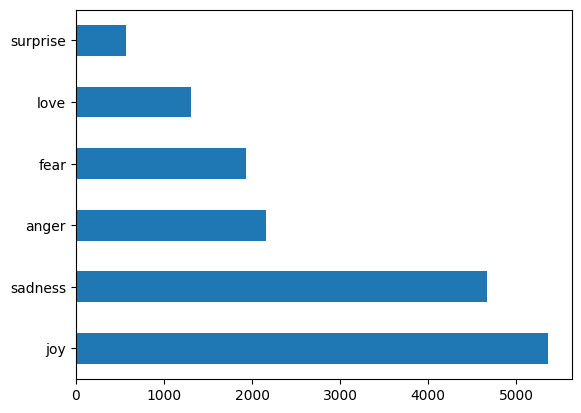

In [33]:
# Class distribution
df["label_name"].value_counts().plot.barh()  # We can see that the dataset is not balanced

### Techniques to Treat Class Imbalance
*   Oversample  the minority classes
*   Undersample the Majority Classes
*   Get more data

https://imbalanced-learn.org/stable/user_guide.html#user-guide



In [ ]:
# Token : An Atomic Piece of Text. Here we assume it to be a Word
# How long are our Tweets

# Transformer Models have a Maximum Input Sequence Length. So check the size of the Tweets
# Note for DistillBert, Context size is 512 Tokens

In [37]:
df['Words_Per_Tweet'] = df['text'].str.split().apply(len)

In [44]:
df['Words_Per_Tweet'].max()

66

<Axes: title={'center': 'Words_Per_Tweet'}, xlabel='label_name'>

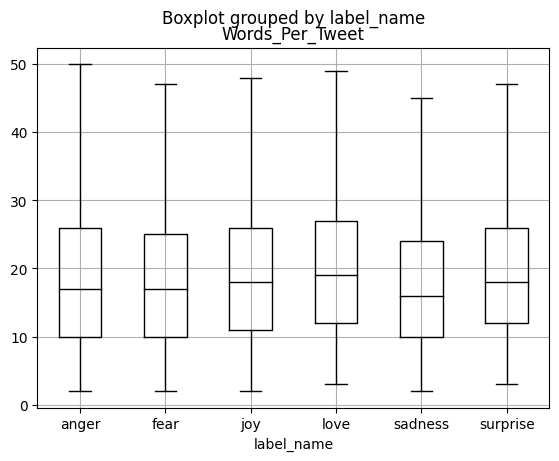

In [43]:
df.boxplot("Words_Per_Tweet", by = "label_name", showfliers=False, color='black')

# Sequence Length Conclusions
*   max lenght seems to be 66.
*   Most Emotions, the average Tweet seems to be 15 words
*   We are overall good (512 Tokens allowed)



In [45]:
# We don't need dataframe format any more. So reset
ds_emotions.reset_format()

# Step 1: Tokenize
*   Character, Word, Subword tokenizers
*   AutoTokenizer or DistilBertTokenizer



In [47]:
from transformers import AutoTokenizer, DistilBertTokenizer

In [49]:
model_ckpt = "distilbert-base-uncased"
tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [51]:
text = "Tokenizing Text is core task of NLP"
encoded_Text = tokenizer(text)

In [52]:
print(encoded_Text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 4563, 4708, 1997, 17953, 2361, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [56]:
tokens = tokenizer.convert_ids_to_tokens(encoded_Text.input_ids)
print(tokens)

# [CLS] and [SEP] indicate start and end of a sequence
# "tokenizing" and "nlp" split into two tokens indicated by ##. This is because these are not common words

['[CLS]', 'token', '##izing', 'text', 'is', 'core', 'task', 'of', 'nl', '##p', '[SEP]']
